## DELTASQUARE / WHO

DeltaSquare, an NGO collaborating with the Government on social policy issues, aims to positively impact the lives of underprivileged communities. Their current objective involves formulating a policy framework based on data obtained from the World Health Organization (WHO). As a data scientist employed by DeltaSquare, you have been assigned the responsibility of addressing this challenge and presenting a proposal to the government.

### Objective:

The objective of the dataset is to explore and address the following primary inquiries:

- What are the various factors that impact an individual's income?
- Does a reliable predictive model for income exist, and if so, how can its performance be assessed?

### Goal

My goal for this project is to a model with minimized errors in the class i am most interested in. I am interested in finding those who earn above 50K. Hence my model should have a high positive in that class and minimal error (Recall_score).

It should be noted that this will increase the predicted number (the error) of those who earn 50K or less as rather people who earn above 50k

<b>Data Dictionary</b>:

- Age: continuous - age of a Person<br>
- Workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
- Fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics-continuous<br>
- Education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
- Education-num: no. of years a person studied - continuous.<br>
- Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
- Sex: Female, Male.<br>
- Capital-gain: Investment gain of the person other than salary - continuous<br>
- Capital-loss: Loss from investments - continuous<br>
- Hours-per-week: No. of hours a person works - continuous.<br>
- Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>
- Salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)<br>

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, SMOTE 

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Load and review data

In [2]:
who_df = pd.read_csv('who_data.csv')

who_df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Each row represents a different individual, and the columns provide information about their characteristics, demographics, and income-related attributes

In [3]:
# showing the columns
who_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [4]:
# check first 5 rows of data set

who_df.shape

(32561, 15)

There are 32561 rows and 15 columns in the dataset. I will cross check for duplicates to ascertain if there are duplicates adding to the number or not

In [5]:
# check duplicates
who_df.duplicated().sum()

24

In [6]:
# Check for duplicate rows
duplicate_rows = who_df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", sum(duplicate_rows))
#print(duplicate_rows)

duplicates = who_df[duplicate_rows]

for index, row in duplicates.iterrows():
    print(row)

Number of duplicate rows: 24
age                                   25
workclass                        Private
fnlwgt                            308144
education                      Bachelors
education_no_of_years                 13
marital_status             Never-married
occupation                  Craft-repair
relationship               Not-in-family
race                               White
sex                                 Male
capital_gain                           0
capital_loss                           0
working_hours_per_week                40
native_country                    Mexico
salary                             <=50K
Name: 4881, dtype: object
age                                        90
workclass                             Private
fnlwgt                                  52386
education                        Some-college
education_no_of_years                      10
marital_status                  Never-married
occupation                      Other-service
relation

There 24 rows being duplicated

In [7]:
# Extracting some of the duplicates

who_df[(who_df["age"]== 25)& (who_df["fnlwgt"]== 308144)]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [8]:
# Dropping the duplicate
who_df.drop_duplicates(inplace=True)

In [9]:
# Sanity check
who_df[(who_df["age"]== 25)& (who_df["fnlwgt"]== 308144)]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [10]:
# Sanity check

who_df.duplicated().sum()

0

The duplicates have been removed

In [11]:
# check shape again

who_df.shape

(32537, 15)

Actual size of the WHO dataset has 32537 rows and 15 columns

In [12]:
# Check the data types
who_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
dtypes:

The output shows that the WHO DataFrame has 32537 entries and 15 columns. The columns section lists the column names, the number of non-null values and data types of each column.

The column type shows that the WHO dataset has six columns with numeric data types (int64), while the other nine columns have object data types

In [13]:
# check for missing values
who_df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

There are no missing values

### Describe data 

In [14]:
# computing descriptive statistics
who_df.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
who_df.describe(include ="object").T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,32537,6,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native_country,32537,42,United-States,29153
salary,32537,2,<=50K,24698


The oldest person is 90 years and the youngest 17 years. With mean age around 38 and median 37. The highest number of working hours per week is 99 and the least 1. Most people work Privately in the workclass. Majority of the people are HS-grad. Most of the people are male with majority earning less or equal to 50K

# Data Preprocessing


   - First, we need to investigate the problems with the columns using unique
           
        - and then group those that need to be grouped
        - replace those that need to be replaced with Unknown

###  Cleaning workclass

In [16]:
# check for the unique workclasses in alphabetical order
sorted(who_df["workclass"].unique())

[' ?',
 ' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay']

I noticed space or preceeding whitespace hence we need to clean all the whitespace in the data

In [17]:
# cleaning the preceeding whitespace
who_df = who_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [18]:
# checking the count of each category
who_df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [19]:
# Combine "Local-gov" and "State-gov" into one LS-gov
who_df['workclass'] = who_df['workclass'].replace(['Local-gov', 'State-gov'], 'LS-Gov')

# Combine "Self-emp-inc" and "Self-emp-not-inc" into one Self-employed
who_df['workclass'] = who_df['workclass'].replace(['Self-emp-inc', 'Self-emp-not-inc'], 'Self-employed')

# Combine "Never-worked" and "Without-pay" into Unemployed 
who_df['workclass'] = who_df['workclass'].replace(['Never-worked', 'Without-pay'], 'Unemployed')

# Replace "?" with Unknown
who_df['workclass'] = who_df['workclass'].replace('?', 'Unknown')


In [20]:
# Sanity check

sorted(who_df["workclass"].unique())

['Federal-gov', 'LS-Gov', 'Private', 'Self-employed', 'Unemployed', 'Unknown']

###  Cleaning marital_status

In [21]:
# check for the unique marital statuses in alphabetical order
sorted(who_df["marital_status"].unique())

['Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed']

In [22]:
# Group Divorced, Separated, and Widowed as Not-Married
who_df['marital_status'].replace(['Divorced', 'Separated', 'Widowed'], 'Not-Married', inplace=True)

# Group Married-AF-spouse, Married-civ-spouse, and Married-spouse-absent as Married
who_df['marital_status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married', inplace=True)


In [24]:
# Sanity check
sorted(who_df["marital_status"].unique())

['Married', 'Never-married', 'Not-Married']

###  Cleaning occupation

In [25]:
# check for the unique occupations in alphabetical order
sorted(who_df["occupation"].unique())

['?',
 'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving']

In [26]:
# Replace "?" with Unknown
who_df['occupation'] = who_df['occupation'].replace('?','Unknown')

In [27]:
# Sanity Check
sorted(who_df["occupation"].unique())

['Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving',
 'Unknown']

In [28]:
who_df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [29]:
who_df[(who_df["occupation"]== "Unknown") &(who_df["workclass"]== "Unknown")]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
27,54,Unknown,180211,Some-college,10,Married,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,Unknown,293936,7th-8th,4,Married,Unknown,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,Unknown,200681,Some-college,10,Never-married,Unknown,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,Unknown,212759,10th,6,Married,Unknown,Husband,White,Male,0,0,2,United-States,<=50K
106,17,Unknown,304873,10th,6,Never-married,Unknown,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Unknown,320084,Bachelors,13,Married,Unknown,Wife,White,Female,0,0,55,United-States,>50K
32531,30,Unknown,33811,Bachelors,13,Never-married,Unknown,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,Unknown,287372,Doctorate,16,Married,Unknown,Husband,White,Male,0,0,10,United-States,>50K
32541,41,Unknown,202822,HS-grad,9,Not-Married,Unknown,Not-in-family,Black,Female,0,0,32,United-States,<=50K


I noticed all those Unknown(?) in workclass are also unknown (?) in occupation

In [30]:
who_df[(who_df["occupation"]== "Unknown") &(who_df["workclass"]!= "Unknown")]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
5361,18,Unemployed,206359,10th,6,Never-married,Unknown,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Unemployed,188535,7th-8th,4,Not-Married,Unknown,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Unemployed,237272,10th,6,Never-married,Unknown,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Unemployed,157131,11th,7,Never-married,Unknown,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Unemployed,462294,Some-college,10,Never-married,Unknown,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Unemployed,176673,HS-grad,9,Married,Unknown,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Unemployed,153663,Some-college,10,Never-married,Unknown,Own-child,White,Male,0,0,4,United-States,<=50K


###  Cleaning Native country

In [31]:
# check for the unique native_country in alphabetical order
sorted(who_df["native_country"].unique())

['?',
 'Cambodia',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Haiti',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hungary',
 'India',
 'Iran',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Laos',
 'Mexico',
 'Nicaragua',
 'Outlying-US(Guam-USVI-etc)',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto-Rico',
 'Scotland',
 'South',
 'Taiwan',
 'Thailand',
 'Trinadad&Tobago',
 'United-States',
 'Vietnam',
 'Yugoslavia']

In [32]:
who_df['native_country'] = who_df['native_country'].replace('?','Unknown')

In [33]:
# Grouping countries into Continents or regions
north_america = ["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala",
                 "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua",
                 "Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago",
                 "United-States"]
asia = ["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
        "Philippines", "Taiwan", "Thailand", "Vietnam"]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = ["England", "France", "Germany", "Greece", "Holand-Netherlands",
          "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland",
          "Yugoslavia"]
other = ["South", "Unknown"]

# Replace countries with their respective Continents
who_df['native_country'] = who_df['native_country'].replace(north_america, 'North America')
who_df['native_country'] = who_df['native_country'].replace(asia, 'Asia')
who_df['native_country'] = who_df['native_country'].replace(south_america, 'South America')
who_df['native_country'] = who_df['native_country'].replace(europe, 'Europe')
who_df['native_country'] = who_df['native_country'].replace(other, 'Others')


In [34]:
# Sanity check

sorted(who_df["native_country"].unique())

['Asia', 'Europe', 'North America', 'Others', 'South America']

### Visualize the data

- #### BIVARIATE ANALYSIS

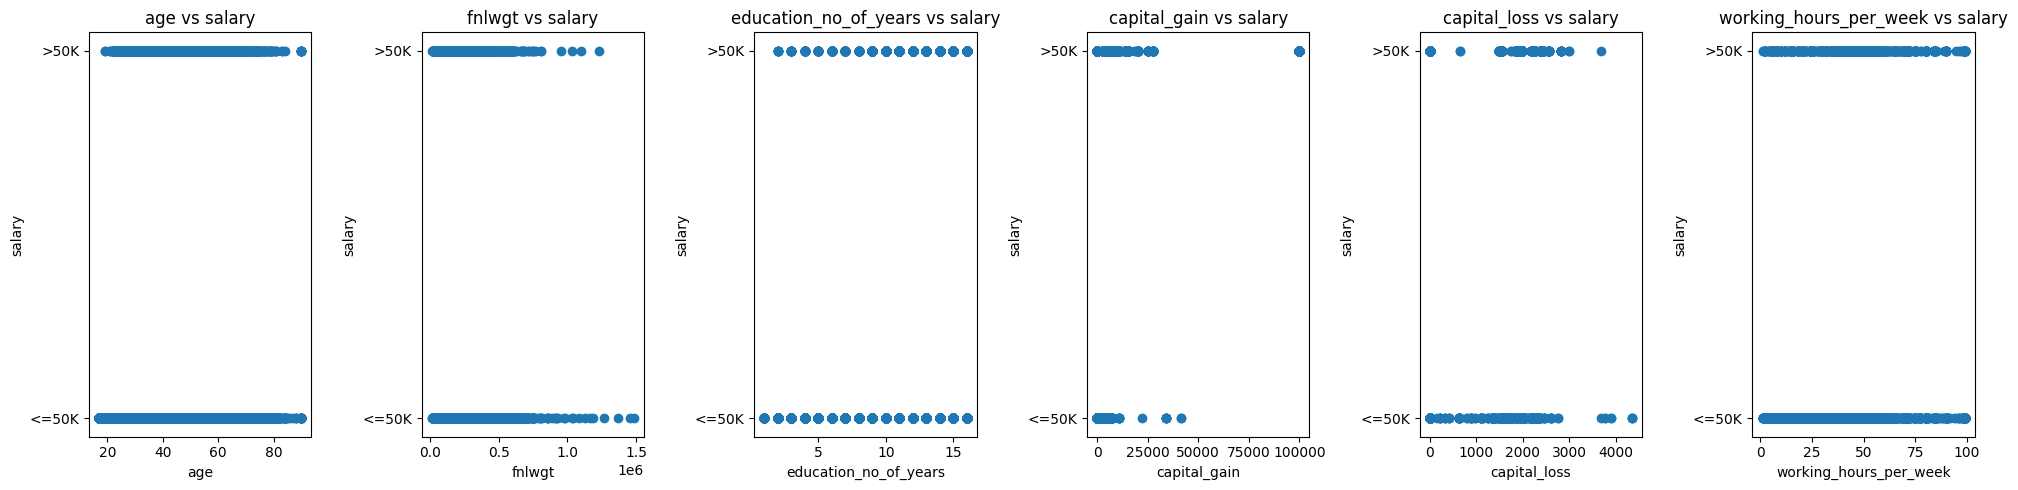

In [35]:
# Define the features and the target variable
x_feat_1 = ['age', 'fnlwgt','education_no_of_years', 'capital_gain', 'capital_loss', 'working_hours_per_week']
y_feat_2 = ["salary"]

fig, axes = plt.subplots(nrows=1, ncols=len(x_feat_1), figsize=(20, 5))

for o, x_feat in enumerate(x_feat_1):
    # Create a scatter plot of the current feature against the target variable
    axes[o].scatter(who_df[x_feat], who_df[y_feat_2[0]])
    
    # Set x-label, y-label, and title for the plot
    axes[o].set_xlabel(x_feat)
    axes[o].set_ylabel(y_feat_2[0])
    axes[o].set_title(f'{x_feat} vs {y_feat_2[0]}')
    
    # Disable grid lines in the plot
    axes[o].grid(False)

# Save the plot as an image file
plt.savefig("scatter_plots_target_salary.png")

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()


It is difficult to tell the relationship using the scatterplot. We shall use countplot

C:\Users\SERWAH\AppData\Local\Temp\ipykernel_24232\3504115664.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("count_plots_target_salary.png")
C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


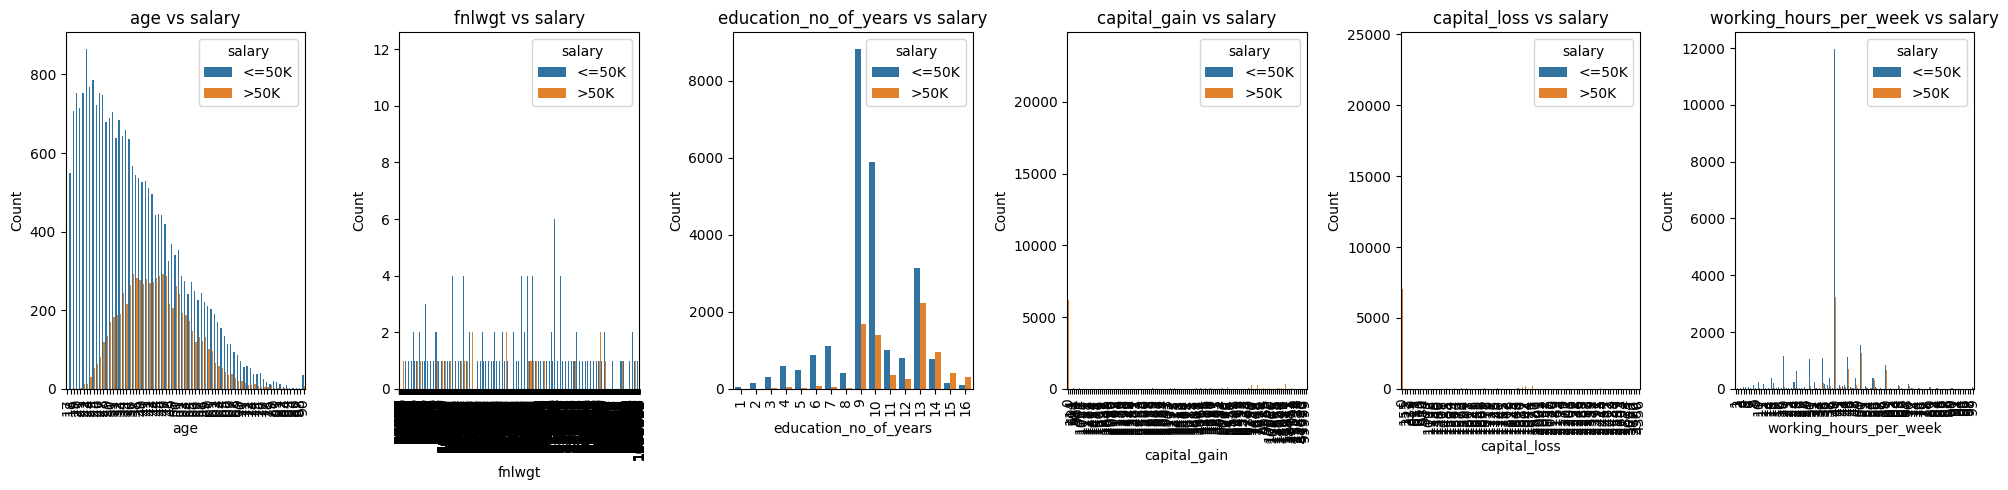

In [36]:
# Define the features and the target variable
x_feat_1 = ['age', 'fnlwgt', 'education_no_of_years', 'capital_gain', 'capital_loss', 'working_hours_per_week']
y_feat_2 = 'salary'

# Create subplots for each feature
fig, axes = plt.subplots(nrows=1, ncols=len(x_feat_1), figsize=(20, 5))

# Loop through each feature
for i, x_feat in enumerate(x_feat_1):
    # Create the count plot
    sns.countplot(data=who_df, x=x_feat, hue=y_feat_2, ax=axes[i])
    
    # Set x-label, y-label, and title for the plot
    axes[i].set_xlabel(x_feat)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{x_feat} vs {y_feat_2}')
    
    # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=90)
    
    # Add a legend
    axes[i].legend(title=y_feat_2)
    
# Adjust the layout to avoid overlapping
plt.tight_layout()

# Save the plot as an image file
plt.savefig("count_plots_target_salary.png")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


There is no correlation between salary and capital gain and also between salary and capital loss. There is also no correlation between salary and fnlwgt. There is some correlation between age and salary , number of years of education and salary and working hours and salary

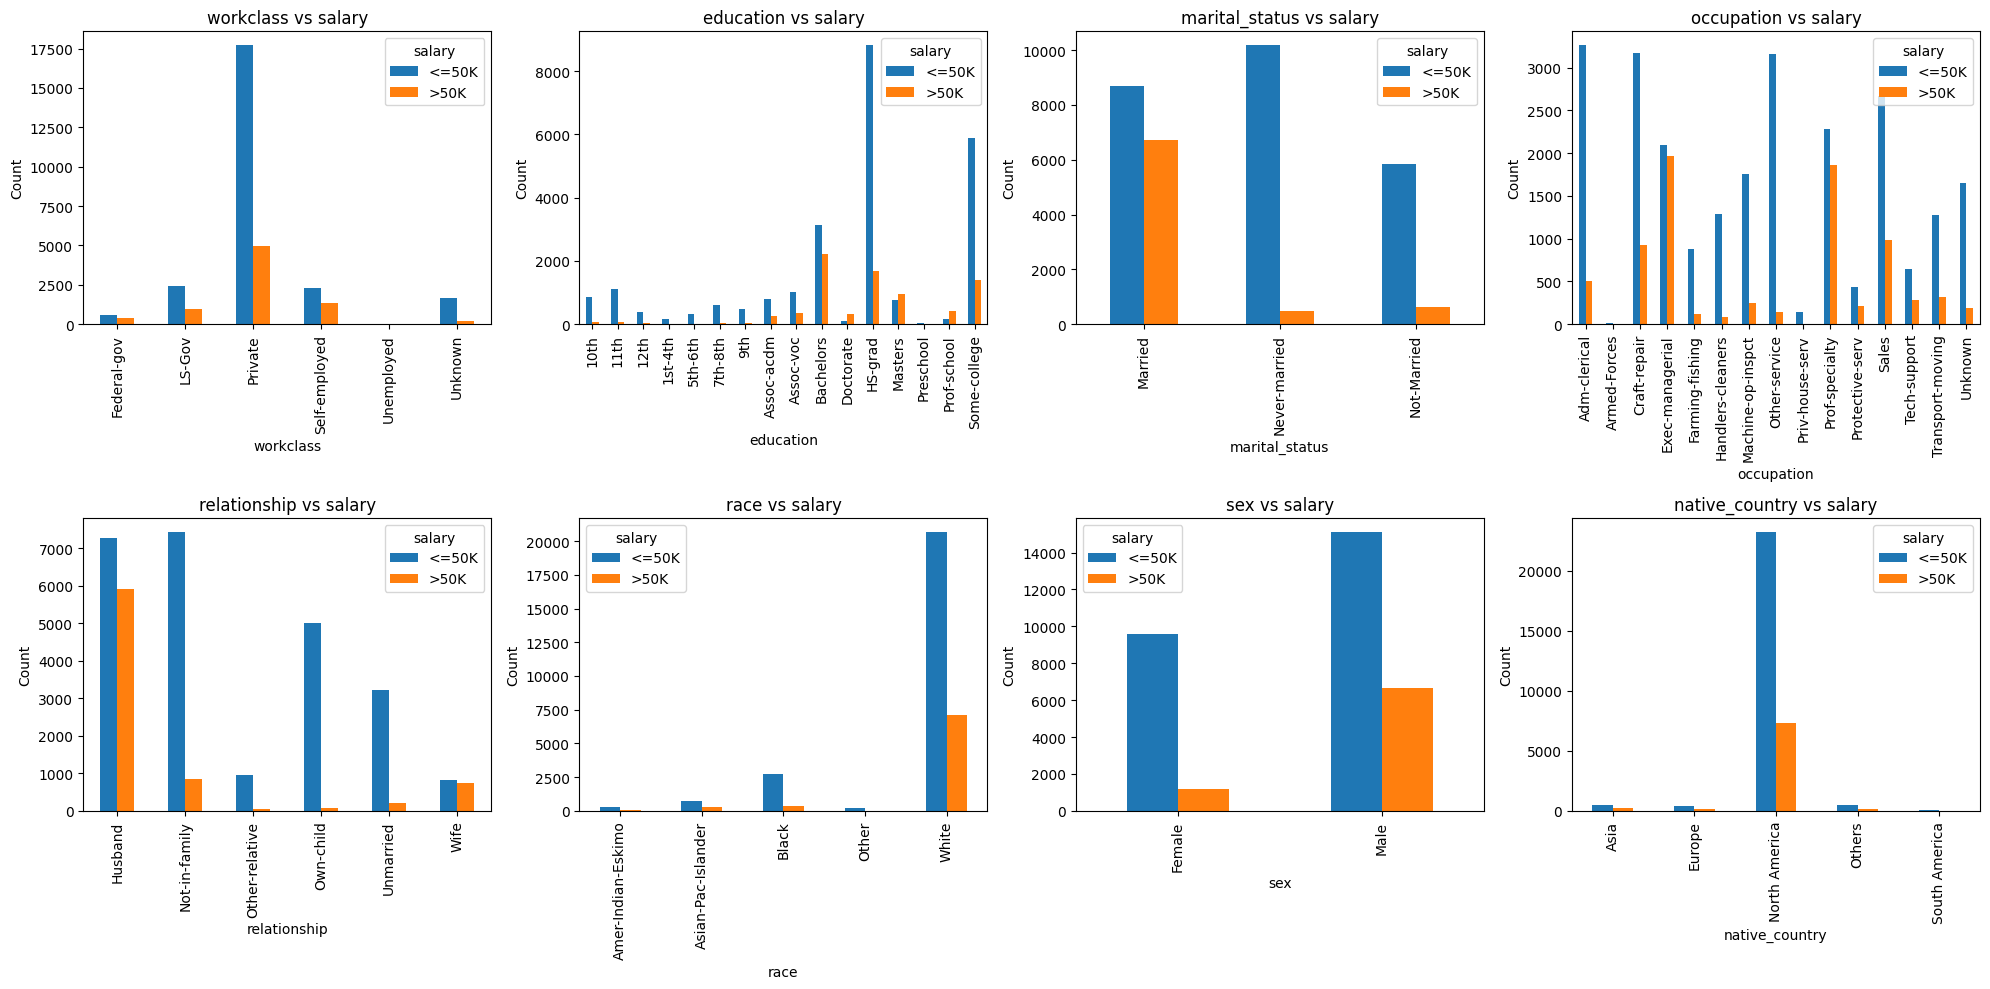

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features and the target variable
x_feat_1 = ["workclass","education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
y_feat_2 = "salary"

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, x_feat in enumerate(x_feat_1):
    # Calculate the counts of each category within the feature and target variable
    counts = who_df.groupby([x_feat, y_feat_2]).size().unstack().fillna(0)
    
    # Create a bar plot using the counts
    ax = axes[i//4, i%4]
    counts.plot(kind='bar', ax=ax)
    
    # Set x-label, y-label, and title for the plot
    ax.set_xlabel(x_feat)
    ax.set_ylabel("Count")
    ax.set_title(f"{x_feat} vs {y_feat_2}")
    
    # Rotate x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Add a legend with the title for the target variable
    ax.legend(title=y_feat_2)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Save the plot as an image file
plt.savefig("bar_plots_count_salary.png")

# Display the plot
plt.show()


Quite a number of people earn over 50k in Private working class. Some people who have Bachelors, Doctorate, HS-Grad, Prof School have salaries above 50K. Alot of married people have salaries above 50K, Occupation such as Armed- Forces, Priv-house-serv have no one earning above 50k. Alot more males earn 50K compared to females. Alot of whits also earn above 50K compared to other races. Husbands generally top those that earn above 50k. North America has about 8000 people earning above 50K, same cannot be said about the other continents. 

- #### UNIVARIATE ANALYSIS

In [38]:
from utils import labeled_barplot

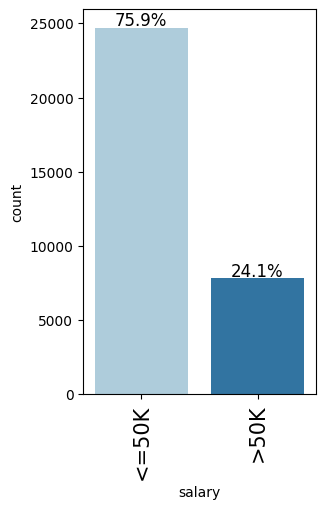

In [39]:
labeled_barplot(data = who_df, feature = 'salary', perc =True)

Data is not balanced . This may cause the model not to perform well due to the influence of the more frequency salary. 75.9% of the people earn less or equal to 50K while 24% earn above 50K. We need to balance the data else the model will be predicting more of the frequent class.

In [40]:
#Value count
who_df["salary"].value_counts(normalize= True)

<=50K    0.759074
>50K     0.240926
Name: salary, dtype: float64

In [41]:
# Encode "salary" target
who_df['salary'] = who_df['salary'].map({'<=50K': 0, '>50K': 1})

In [42]:
who_df['salary'].value_counts()

0    24698
1     7839
Name: salary, dtype: int64

## Identifying Correlation in data 

In [43]:
# Select numerical variables
who_num_data = who_df.select_dtypes(include = "number")

In [44]:
# check for correlation
mat_corr = who_num_data.corr()
mat_corr

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,salary
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education_no_of_years,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
working_hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
salary,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


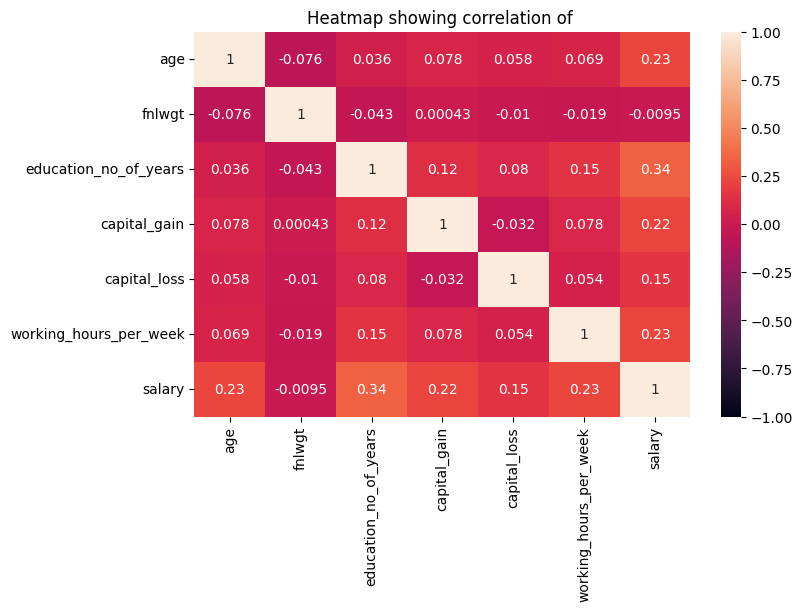

In [45]:
plt.figure(figsize = (8,5))
sns.heatmap(mat_corr, annot= True, vmin = -1, vmax = 1)
plt.title("Heatmap showing correlation of ");


There is a positive correlation between the target (salary) and some features(number of years spent studying, age, working hours, capital gain and capital loss). There is a negative correlation between salary and fnlwgt. There is low multicollinearity among the features.

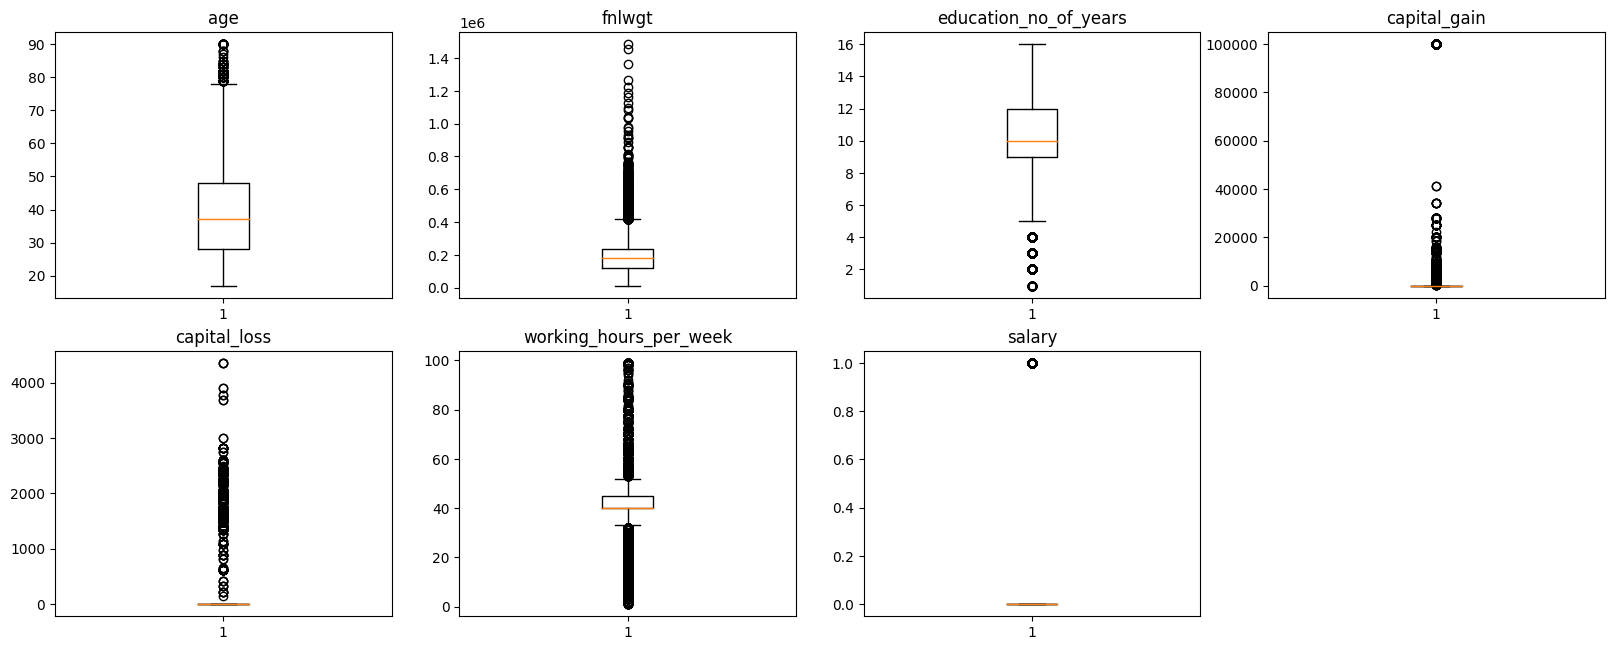

In [46]:
# outlier detection using boxplot
plt.figure(figsize = (20, 20))

for i, variable in enumerate (who_num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(who_df[variable])
    plt.title(variable)

plt.savefig("outlier_plots.png")
plt.show()

We are able to visualize all the outliers in the numerical features. All the numerical features have outliers. We will treat all the outliers minus the target which is salary

In [47]:
# Drop the salary
who_num_data.drop(["salary"], axis = 1, inplace = True)

who_num_data.columns

Index(['age', 'fnlwgt', 'education_no_of_years', 'capital_gain',
       'capital_loss', 'working_hours_per_week'],
      dtype='object')

In [48]:
# Function to treat outliers in numerical variables using IQR method
def treat_outliers(who_df, col):
    """
    Treat outliers in numerical variables
    df: DataFrame
    col: str, name of the numerical variable
    """
    Q1 = who_df[col].quantile(0.25) # first quartile
    Q3 = who_df[col].quantile(0.75) # third quartile
    IQR = Q3 - Q1 # interquartile range
    lower_whisker = Q1 - (1.5 * IQR) # calculate lower whisker
    upper_whisker = Q3 + (1.5 * IQR) # calculate upper whisker
    who_df[col] = np.clip(who_df[col], lower_whisker, upper_whisker) # clip the values of the variable between the lower and upper whisker
    return who_df

I used clipping to treat the outlier, any outlier below the lower whisker or upper whiskers were clipped to the the lower and upper whiskers respectively

In [49]:
# Function to treat outliers in all numerical variables of a DataFrame
def treat_outliers_all(who_df, col_list):
    """
    Treat outliers in all numerical variables of a DataFrame
    df: DataFrame
    col_list: list of str, names of the numerical variables
    """
    for w in col_list:
        who_df = treat_outliers(who_df, w)
    return who_df

In [50]:
who_df = treat_outliers_all(who_df, who_num_data)

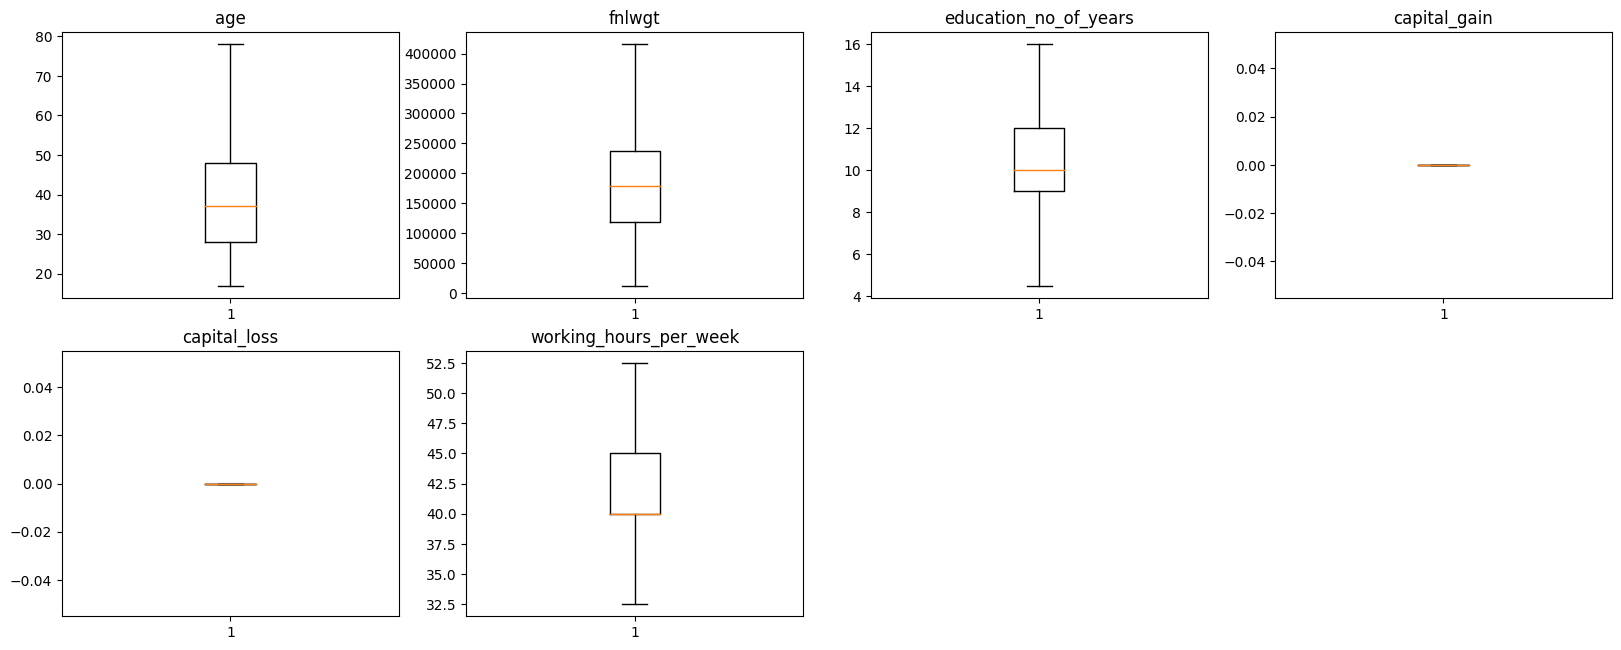

In [51]:
# outlier detection using boxplot
plt.figure(figsize = (20, 20))

for i, variable in enumerate (who_num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(who_df[variable])
    plt.title(variable)

plt.savefig("outlier_plots.png")
plt.show()

The outliers have been treated by clipping

In [52]:
# Select features and target

x= who_df[["age","workclass","education", "education_no_of_years","marital_status", "occupation", "race", "capital_gain", "capital_loss","working_hours_per_week" ,"native_country"]]

y= who_df["salary"]

In [53]:
# OneHotEncoding on selected features
x_encoded = pd.get_dummies(x, drop_first = True)

x_encoded.head()

,age,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,workclass_LS-Gov,workclass_Private,workclass_Self-employed,workclass_Unemployed,workclass_Unknown,...,occupation_Transport-moving,occupation_Unknown,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_country_Europe,native_country_North America,native_country_Others,native_country_South America
0,39,13.0,0,0,40.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,50,13.0,0,0,32.5,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,38,9.0,0,0,40.0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,53,7.0,0,0,40.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,28,13.0,0,0,40.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [54]:
# encoding the target
le= LabelEncoder()

y_encoded = le.fit_transform(y) # Transforming the salary

In [55]:
from collections import Counter
Counter(y_encoded)

Counter({0: 24698, 1: 7839})

## Building models

- #### Cross Validation Model

In [56]:
# Create logistic regression model
logreg_cv = LogisticRegression(random_state= 0, max_iter=1000, solver='liblinear')

kfold = KFold(shuffle= True)

# Perform k-fold cross-validation with recall as the scoring metric
cv_scores = cross_val_score(logreg_cv, x_encoded, y_encoded , cv= kfold, scoring = "recall")

In [57]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.54783163 0.53093434 0.56176084 0.53606965 0.52408478]
Average cross-validation score: 0.5401362494494845


The average recall score is approximately 0.5401, which suggests that the model is able to correctly identify around 54% of the positive instances on average across the folds.

With a recall of 54%, it means that the logistic regression model correctly identifies 54% of the positive instances (individuals with a salary greater than 50,000 dollars per year) out of all the actual positive instances in the dataset.

In this context, it suggests that the model is able to capture roughly a half of the individuals who earn more than 50,000 dollars per year correctly. However, it also indicates that there is room for improvement in identifying a higher proportion of positive instances accurately.

In [58]:
# # drop
# x = who_df.drop("salary", axis = 1)
# y= who_df["salary"]

In [59]:
# Split data into training, validation, and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x_encoded, y_encoded, test_size=0.2, random_state=0, stratify=y_encoded)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=0, stratify=y_train_val)

The stratify parameter in the train_test_split function is used to ensure that the class distribution is preserved in the train, validation, and test sets. It helps to maintain the same proportion of classes in each set as the original dataset.

- #### Logistic Regression Model 1

In [60]:
# Scale the feature matrices using MinMaxScaler
scaler = MinMaxScaler()

x_train_sd = scaler.fit_transform(x_train)
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

In [61]:
# Assign column names to scaled data
x_train_sd = pd.DataFrame(x_train_sd, columns=x_train.columns)
x_val_sd = pd.DataFrame(x_val_sd, columns=x_val.columns)
x_test_sd = pd.DataFrame(x_test_sd, columns=x_test.columns)

In [62]:
# Build the model
log_reg = LogisticRegression(random_state= 0, class_weight= {1:0.9,0:0.1}, max_iter=1000)

# Fit the model to the training data
log_reg.fit(x_train_sd, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=1000, random_state=0)

In [63]:
log_reg.score(x_train_sd, y_train)

0.6891898381597272

In [64]:
log_reg.score(x_val, y_val)

0.24087591240875914

In [65]:
log_reg.score(x_test, y_test)

0.24093423478795328

It appears that the model is not performing well. Here are the scores:

Training accuracy: 0.689
Validation accuracy: 0.241
Test accuracy: 0.241
The low accuracy scores suggest that the model is not able to effectively generalize to new, unseen data. This could be an indication of overfitting.

In [66]:
# Build the model
log_reg = LogisticRegression(random_state= 0, solver='liblinear')

# Fit the model to the training data
log_reg.fit(x_train_sd, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [67]:
log_reg.score(x_train_sd, y_train)

0.8332132737837967

In [68]:
log_reg.score(x_val, y_val)

0.24087591240875914

In [69]:
log_reg.score(x_test, y_test)

0.24093423478795328

The model is performing relatively well on the training data but not as well on the validation and test data. Here are the scores:

Training accuracy: 0.833
Validation accuracy: 0.241
Test accuracy: 0.241

The high training accuracy may indicate that the model is able to fit well to the training data compared with previous. However, the significantly lower accuracy on the validation and test data suggests that the model is not generalizing well to unseen data.

This discrepancy between the training and validation/test accuracies may indicate overfitting

#### Confusion Matrix

In [70]:
# from utils import model_performance_classification

In [71]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:,1]
    
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)# to compute accuracy
    recall = recall_score(target, pred_class) # to compute recall
    precision = precision_score(target, pred_class) # compute precision
    f1 = f1_score(target, pred_class) # to compute F1 Score

       # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf =  confusion_matrix(target, pred_class)
    plt.figure(figsize = (8,5))
    sns.heatmap(conf, annot = True, fmt = "g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()

    return df_perf

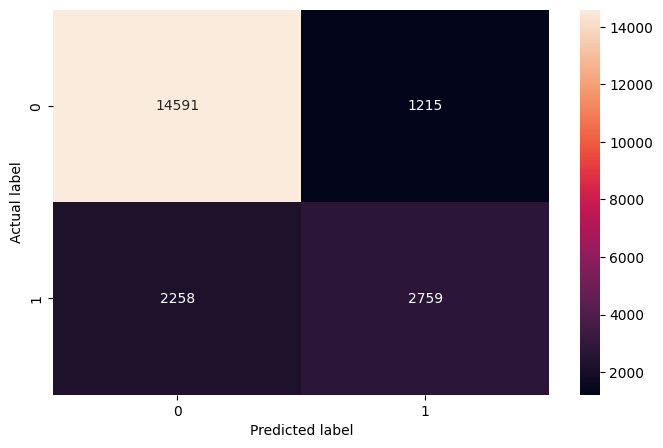

,Accuracy,Recall,Precision,F1-score
0,0.833213,0.54993,0.694263,0.613725


In [72]:
log_reg_train = model_performance_classification(log_reg, x_train_sd,y_train)
log_reg_train

14591(TN) and 2759(TP) are the correct predictions of the model

2258(FN) and 1215(FP) are the wrong predictions the model makes.

~ FN- wrongly predicting positive class as negative~

The model predicts correctly that 14591 people earn up to 50K or less and 2759 people earn above 50k.

The model predicts wrongly that 1215 people who earn 50k or less are earning above 50k and 2258 people who earn above 50K are earning 50K or less according to the confusion matrix.

Accuracy of 0.833 is how much correct predictions were made on salary earnings ((TN+TP)/(TN+TP+FN+FP)) 

Precision of 0.694 is  how much model got correctly out of the positive prediction ((TP)/(TP+FP)). Model got 69% (2759) correctly on those who earn above 50K. Precision is on the postive predictions of the data

Recall is out of those who earn above 50k (FN+TP) the model predicted correctly 54.99% (TP)(2759). Recall is on the positive class in the data

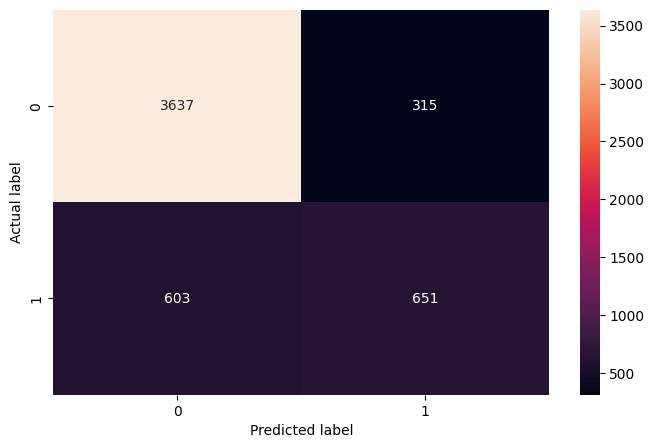

,Accuracy,Recall,Precision,F1-score
0,0.823665,0.519139,0.673913,0.586486


In [73]:
log_reg_val = model_performance_classification(log_reg, x_val_sd,y_val)
log_reg_val

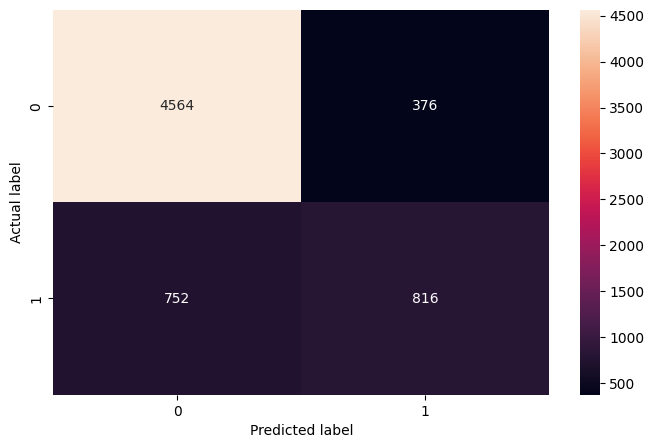

,Accuracy,Recall,Precision,F1-score
0,0.826675,0.520408,0.684564,0.591304


In [74]:
log_reg_test = model_performance_classification(log_reg, x_test_sd,y_test)
log_reg_test

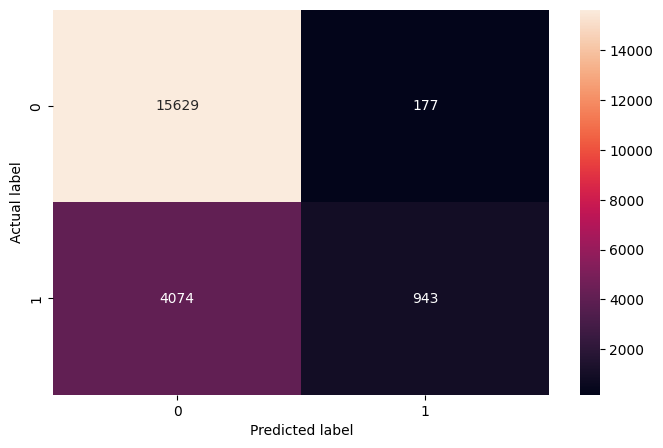

,Accuracy,Recall,Precision,F1-score
0,0.795851,0.187961,0.841964,0.307316


In [75]:
# changing metrics
log_reg2_train = model_performance_classification(log_reg, x_train_sd,y_train, threshold  = 0.8)
log_reg2_train

The model predicts correctly that 15629 people earn up to 50K or less and 943 people earn above 50k.

The model predicts wrongly that 177 people who earn 50k or less are earning above 50k and 4074 people who earn above 50K are earning 50K or less according to the confusion matrix.

An increase in the threshold increased Precision and reduced recall

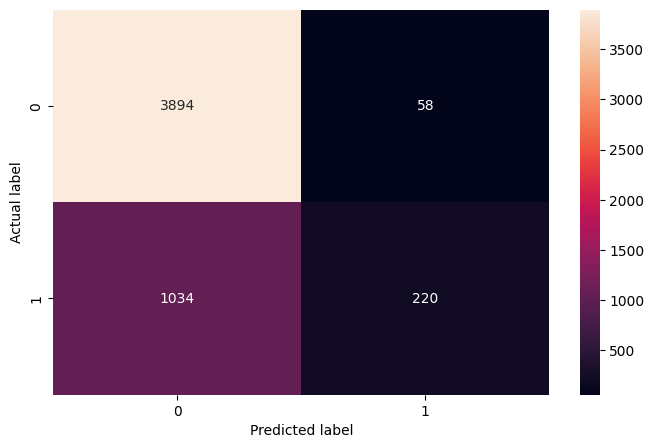

,Accuracy,Recall,Precision,F1-score
0,0.790242,0.175439,0.791367,0.287206


In [76]:
log_reg2_val = model_performance_classification(log_reg, x_val_sd,y_val, threshold  = 0.8)
log_reg2_val

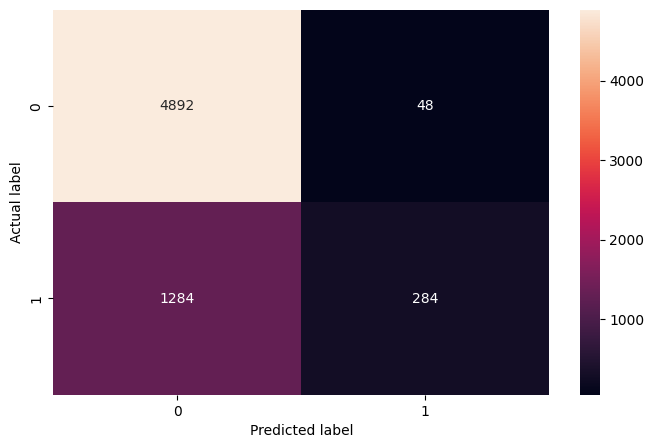

,Accuracy,Recall,Precision,F1-score
0,0.795329,0.181122,0.855422,0.298947


In [77]:
log_reg2_test = model_performance_classification(log_reg, x_test_sd,y_test, threshold  = 0.8)
log_reg2_test

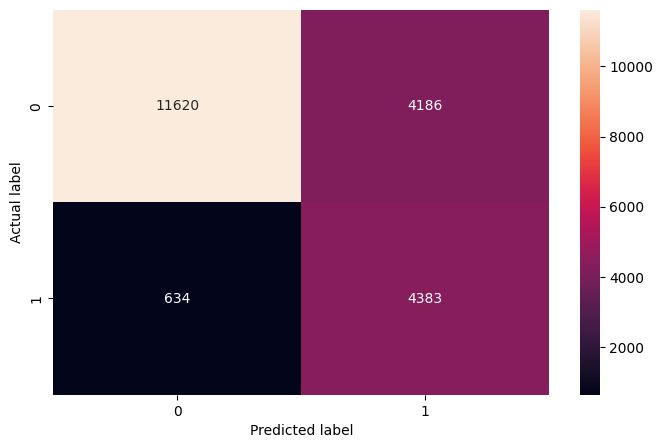

,Accuracy,Recall,Precision,F1-score
0,0.768525,0.87363,0.511495,0.645223


In [78]:
log_reg3_train = model_performance_classification(log_reg, x_train_sd,y_train, threshold  = 0.2)
log_reg3_train

The model predicts correctly that 11620 people earn up to 50K or less and 4383 people earn above 50k.

The model predicts wrongly that 4186 people who earn 50k or less are earning above 50k and 634 people who earn above 50K are earning 50K or less according to the confusion matrix.

A decrease in the threshold increased the Recall and reduced Precision

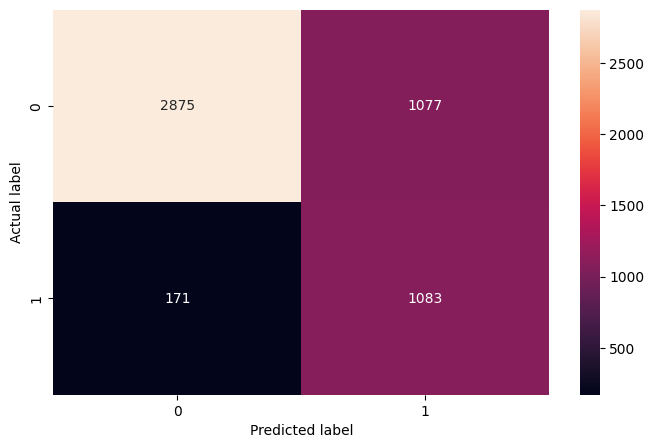

,Accuracy,Recall,Precision,F1-score
0,0.760277,0.863636,0.501389,0.634446


In [79]:
log_reg3_val = model_performance_classification(log_reg, x_val_sd,y_val, threshold  = 0.2)
log_reg3_val

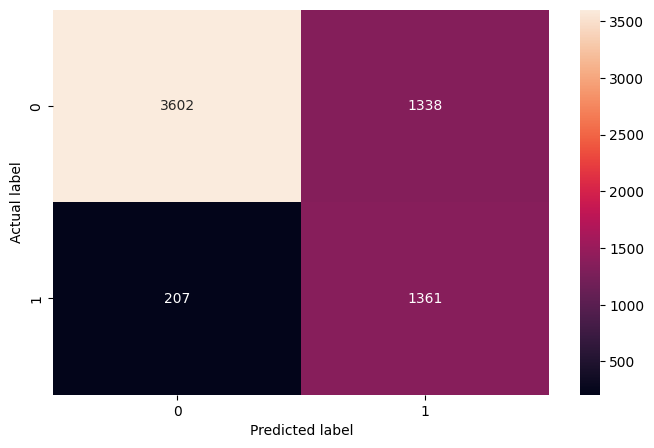

,Accuracy,Recall,Precision,F1-score
0,0.7626,0.867985,0.504261,0.637919


In [80]:
log_reg3_test = model_performance_classification(log_reg, x_test_sd,y_test,
                                                 threshold  = 0.2)
log_reg3_test

log_reg:

Training: The model shows decent performance with reasonably high accuracy, recall, precision, and F1-score. It seems to be performing well and capturing patterns in the training data.

Validation: The model performs consistently well on the validation data, with similar metrics as the training data. This indicates that it is generalizing well and not overfitting.

Test: The model's performance on the test data is also similar to the training and validation data, suggesting that it generalizes well to unseen data.

log_reg2 (with threshold 0.8):

Training: The model shows lower accuracy, recall, precision, and F1-score compared to the previous model. The low recall suggests that it may have difficulty identifying positive instances correctly.

Validation: The performance on the validation data is consistent with the training data, with low recall and precision. This indicates that the model is not performing well in correctly identifying positive instances.

Test: The metrics on the test data align with the performance on the validation data, further indicating the model's limitations in correctly identifying positive instances.

log_reg3 (with threshold 0.2):

Training: The model performs reasonably well in terms of accuracy and recall, but precision is relatively low. This indicates that it may generate more false positives.

Validation: The performance on the validation data is similar to the training data, with comparable metrics. The model seems to generalize reasonably well to unseen data.

Test: The model's performance on the test data aligns with the validation data, suggesting its ability to generalize to new instances.

In summary, the log_reg model without any threshold adjustment appears to be performing well and generalizing to new data. On the other hand, the log_reg2 model with a threshold of 0.8 shows signs of underfitting, as it struggles to correctly identify positive instances. The log_reg3 model with a threshold of 0.2 shows a decent performance but may have a higher false-positive rate. 

I am comfortable with the results log_reg3 model gives based on the recall_score

- #### Logistic Regression Model 2

### Forward feature selection

In [81]:
# Instantiate the logistic regression model
logreg = LogisticRegression(random_state = 0, max_iter=1000)

# Build the forward feature selection
sfs = SFS(logreg, k_features=x_train.shape[1], forward=True, verbose=2, scoring="recall", cv=5)

# Fit the model
sfs = sfs.fit(x_train_sd, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    2.5s finished

[2023-05-17 15:44:48] Features: 1/49 -- score: 0.21606237065695347[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    2.7s finished

[2023-05-17 15:44:51] Features: 2/49 -- score: 0.46601252020829936[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    3.3s finished

[2023-05-17 15:44:54] Features: 3/49 -- score: 0.48195791112717623[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    9.2s finished

[2023-05-17 15:48:02] Features: 28/49 -- score: 0.5409568108423732[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   10.5s finished

[2023-05-17 15:48:13] Features: 29/49 -- score: 0.5411562126369894[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   10.3s finished

[2023-05-17 15:48:23] Features: 30/49 -- score: 0.5403593998879854[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   10.2s finished

[2023-05-17 15:48:34] Features: 31/

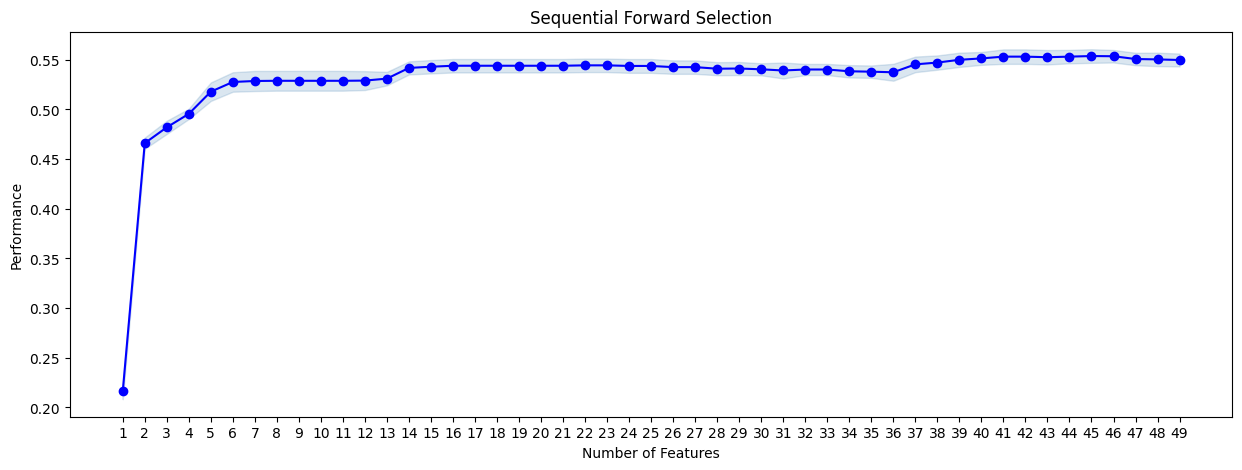

In [82]:
# Plotting the performance of the features
fig1= plot_sfs(sfs.get_metric_dict(), kind= "std_err", figsize = (15,5))
plt.title("Sequential Forward Selection")

plt.show()

16 features performs well or contributes to the target and afterwards becomes stable or the contribution of the rest is very minimal

#### Rebuild the model with selected features

In [83]:
# selecting best performing features
sfs = SFS(logreg, k_features= 16, forward= True, verbose= 2, scoring= "recall",n_jobs = -1)

sfs = sfs.fit(x_train_sd,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    4.8s finished

[2023-05-17 15:50:53] Features: 1/16 -- score: 0.21606237065695347[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.9s finished

[2023-05-17 15:50:54] Features: 2/16 -- score: 0.46601252020829936[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.2s finished

[2023-05-17 15:50:55] Features: 3/16 -- score: 0.48195791112717623[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.4s finished

[2023-05-17 15:50:57] Features: 4/16 -- score: 0.4955128637990411[Parallel(n_jobs=-1)]

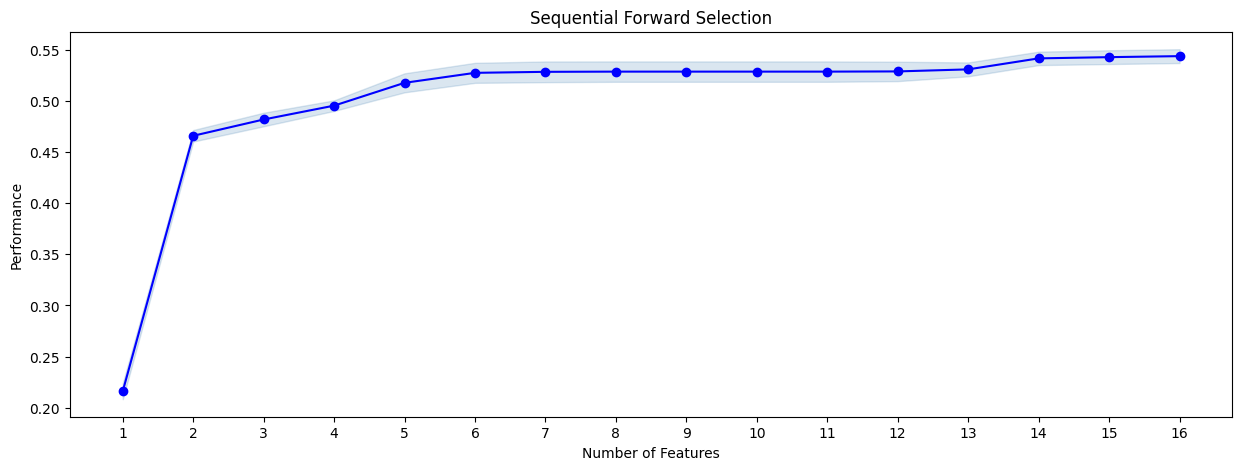

In [84]:
# Plotting the performance of the features
fig1= plot_sfs(sfs.get_metric_dict(), kind = "std_err", figsize = (15,5))
plt.title("Sequential Forward Selection")

plt.show()

In [85]:
# important features
list(sfs.k_feature_idx_)

[1, 2, 3, 4, 8, 11, 13, 14, 25, 26, 29, 30, 31, 32, 33, 48]

In [86]:
list(sfs.k_feature_names_)

['education_no_of_years',
 'capital_gain',
 'capital_loss',
 'working_hours_per_week',
 'workclass_Unemployed',
 'education_12th',
 'education_5th-6th',
 'education_7th-8th',
 'marital_status_Never-married',
 'marital_status_Not-Married',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'native_country_South America']

Based on the feature importance results and the target variable "Salary," the following features have been identified as important in predicting salary:

These features are deemed important because they contribute significantly to the predictive power of the model in determining the salary category of individuals. The model considers factors such as education, capital gains and losses, working hours, employment status, marital status, occupation, and native country to make predictions regarding whether an individual's salary is above or below $50,000 per year.

- education_no_of_years: The number of years of education has a significant influence on salary. Generally, individuals with higher education tend to earn higher salaries.

- capital_gain: Capital gains, which represent the profit from the sale of an asset, are positively correlated with salary. Higher capital gains suggest higher income.

- capital_loss: Capital losses, which occur when an asset is sold for less than its purchase price, also impact salary. Higher capital losses may indicate lower income.

- working_hours_per_week: The number of hours worked per week is positively associated with salary. Generally, individuals who work more hours tend to earn higher salaries.

- workclass_Unemployed: Being unemployed is negatively correlated with salary. Employed individuals typically have higher incomes compared to those who are unemployed.

- education_12th, education_5th-6th, education_7th-8th: These education levels, specifically 12th grade, 5th-6th grade, and 7th-8th grade, have some influence on salary. Individuals with higher education levels tend to have higher incomes.

- marital_status_Never-married, marital_status_Not-Married: Being never married or not currently married is associated with lower salaries compared to being married. Marital status can impact income levels.

- occupation_Exec-managerial, occupation_Farming-fishing, occupation_Handlers-cleaners, occupation_Machine-op-inspct, occupation_Other-service: These occupations have varying levels of influence on salary. Certain occupations such as executive-managerial roles tend to have higher salaries, while others like farming-fishing or handlers-cleaners may have lower salaries.

- native_country_South America: The country of origin, specifically South America, can also impact salary. Individuals from certain regions may have different income levels. 

Based on these findings, it will help me suggest to DeltaSquare to propose a policy framework that targets specific aspects such as education, employment, and occupation to uplift underprivileged communities and improve their chances of earning a higher salary. This may include initiatives for enhancing education opportunities, providing skill development programs, promoting employment in higher-paying occupations, and addressing income disparities related to different native countries. Further analysis will help fine tune the sugggestions

In [87]:
# important features
feat_cols = list(sfs.k_feature_idx_)

x_train2 =x_train[x_train.columns[feat_cols]]
x_test2 = x_test[x_test.columns[feat_cols]]
x_val2 = x_val[x_val.columns[feat_cols]]

In [88]:
# renormalizing the original data
scaler = MinMaxScaler()

x_train2_sd = scaler.fit_transform(x_train2)
x_val2_sd = scaler.transform(x_val2)
x_test2_sd = scaler.transform(x_test2)

In [89]:
# re-build the logistic regression
log_reg4 = LogisticRegression(random_state = 0, max_iter=1000)

log_reg4.fit(x_train2_sd, y_train)

LogisticRegression(max_iter=1000, random_state=0)

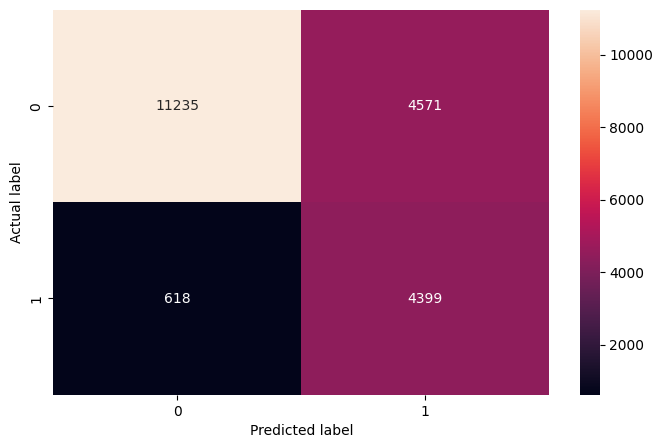

,Accuracy,Recall,Precision,F1-score
0,0.750804,0.876819,0.490412,0.629013


In [90]:
log_reg4_train = model_performance_classification(log_reg4, x_train2_sd, y_train, threshold  = 0.2)
log_reg4_train

The model predicts correctly that 11235 people earn up to 50K or less and 4399 people earn above 50k.

The model predicts wrongly that 4571 people who earn 50k or less are earning above 50k and 618 people who earn above 50K are earning 50K or less according to the confusion matrix.

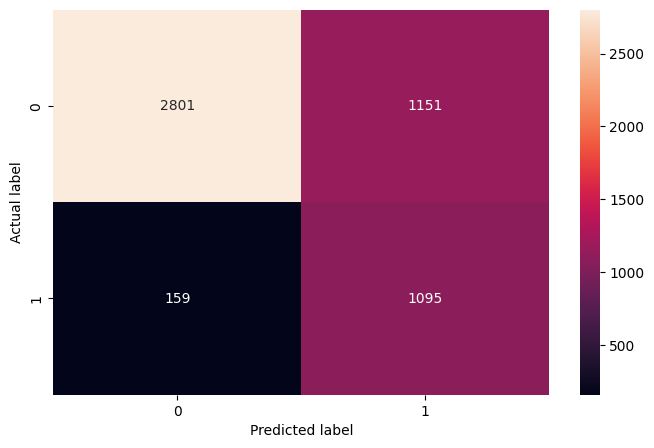

,Accuracy,Recall,Precision,F1-score
0,0.748367,0.873206,0.487533,0.625714


In [91]:
log_reg4_val = model_performance_classification(log_reg4, x_val2_sd,y_val, threshold  = 0.2)
log_reg4_val

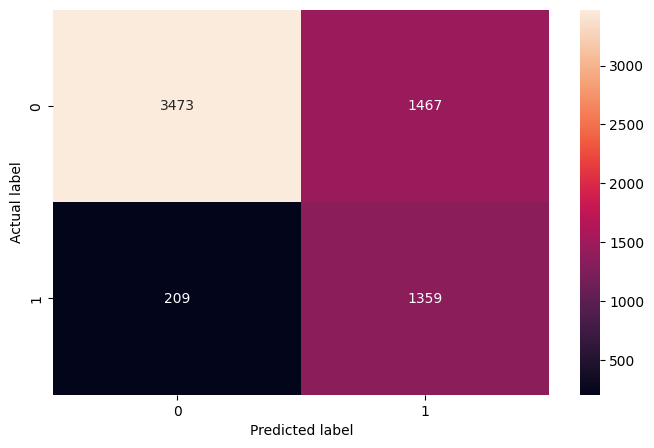

,Accuracy,Recall,Precision,F1-score
0,0.742471,0.866709,0.480892,0.618571


In [92]:
log_reg4_test = model_performance_classification(log_reg4, x_test2_sd,y_test, threshold  = 0.2)
log_reg4_test

Based on these metrics, it appears that the model is performing reasonably well but might be slightly underfitting. This is indicated by the moderate performance across all datasets, as the model could potentially achieve higher recall, precision, and F1-score values.

Although the model's accuracy is around 74-75%, indicating that it correctly classifies the majority of the samples, the precision and F1-score are relatively low. This suggests that the model may have difficulty correctly identifying positive instances (individuals with a salary greater than $50K). The recall values are relatively high, indicating that the model has better performance in identifying true positive instances.

The consistent performance across the training, validation, and test sets suggests that the model is generalizing well and not overfitting to the training data. However, the relatively low precision and F1-score indicate that there is room for improvement in correctly predicting the positive class.

To improve the model's performance,we will balance the data using SMOTE.


- #### Logistic Regression Model 3

### Model Improvement strategy

- Balancing our imbalanced data using SMOTE

In [93]:
# instantiate the model

smt = SMOTE(random_state=0)

In [94]:
x_smt, y_smt = smt.fit_resample(x_encoded, y_encoded)

In [95]:
y.value_counts(normalize = True)

0    0.759074
1    0.240926
Name: salary, dtype: float64

In [96]:
unique_values, value_counts = np.unique(y_smt, return_counts=True)
value_counts_normalized = value_counts / len(y_smt)

for value, count, count_normalized in zip(unique_values, value_counts, value_counts_normalized):
    print(f"{value}: {count} ({count_normalized:.2%})")


0: 24698 (50.00%)
1: 24698 (50.00%)


In [97]:
Counter(y_smt)

Counter({0: 24698, 1: 24698})

#### Split data into training, validation, and test sets

In [98]:
# Split the data into training and testing sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x_smt, y_smt, test_size=0.2, 
                                                            random_state=0, stratify=y_smt)
# Further split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, 
                                                  test_size=0.2, random_state=0, stratify=y_train_val)

In [99]:
# Assign columns to scaled data

x_train_smt =x_train[x_train.columns[feat_cols]]
x_val_smt = x_val[x_val.columns[feat_cols]]
x_test_smt = x_test[x_test.columns[feat_cols]]

In [100]:
# renormalizing the original data
scaler = MinMaxScaler()

x_train_smt_sd = scaler.fit_transform(x_train_smt)
x_val_smt_sd = scaler.transform(x_val_smt)
x_test_smt_sd = scaler.transform(x_test_smt)

In [101]:
# re-build the logistic regression
log_reg5 = LogisticRegression(random_state = 0, max_iter=1000, class_weight= {0:0.10,1:0.90})

log_reg5.fit(x_train_smt_sd, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=1000, random_state=0)

In [1]:
log_reg5_train = model_performance_classification(log_reg5, x_train_smt_sd, y_train)
log_reg5_train

NameError: name 'model_performance_classification' is not defined

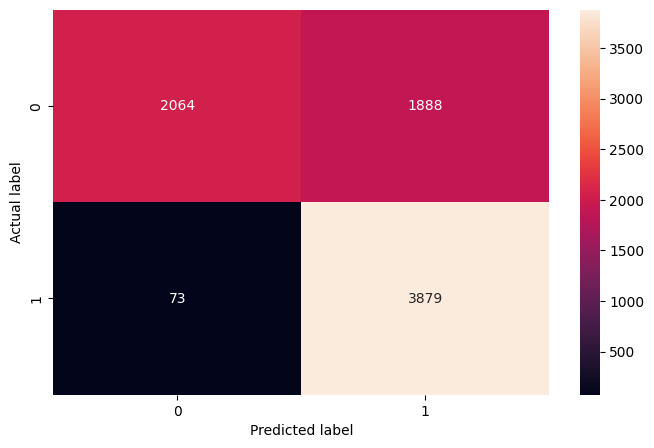

,Accuracy,Recall,Precision,F1-score
0,0.751898,0.981528,0.67262,0.79823


In [103]:
log_reg5_val = model_performance_classification(log_reg5, x_val_smt_sd, y_val)
log_reg5_val

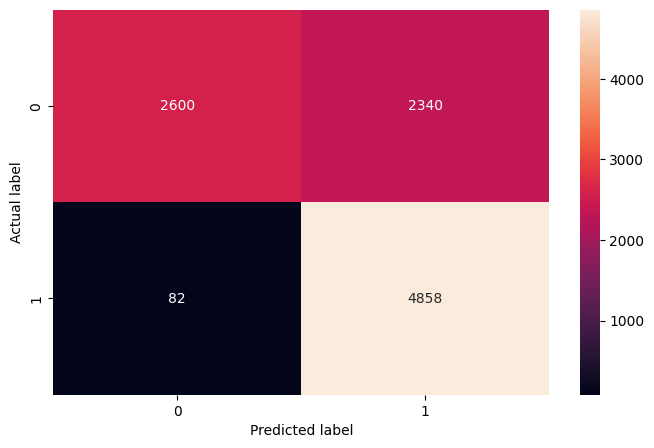

,Accuracy,Recall,Precision,F1-score
0,0.754858,0.983401,0.67491,0.800461


In [104]:
log_reg5_test = model_performance_classification(log_reg5, x_test_smt_sd, y_test)
log_reg5_test

The model's performance on the training, validation, and test sets is relatively consistent, with the metrics showing similar values across the three sets. This indicates that the model is generalizing well and not overfitting.

The accuracy scores on all sets are reasonably high and similar, suggesting that the model is making accurate predictions on the majority of instances.

The recall values are high across all sets, indicating that the model effectively captures positive instances. This is particularly important as we want to identify positive cases in the earnings above 50k.

The precision values are moderate, suggesting that the model achieves a reasonable balance between correctly classifying positive instances and minimizing false positives.

The F1-scores are also consistent across all sets and are relatively high, indicating a good balance between precision and recall.

Considering these observations, it appears that the model is performing well without any threshold being tuned or significant signs of underfitting or overfitting. The consistency in performance across the training, validation, and test sets suggests that the model is generalizing well to unseen data.

We shall employ Decision tree and compare results.

### Decision Trees

In [105]:
# create an instance
dec_tree = DecisionTreeClassifier(random_state= 0, class_weight={0:0.1, 1:0.9})

dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

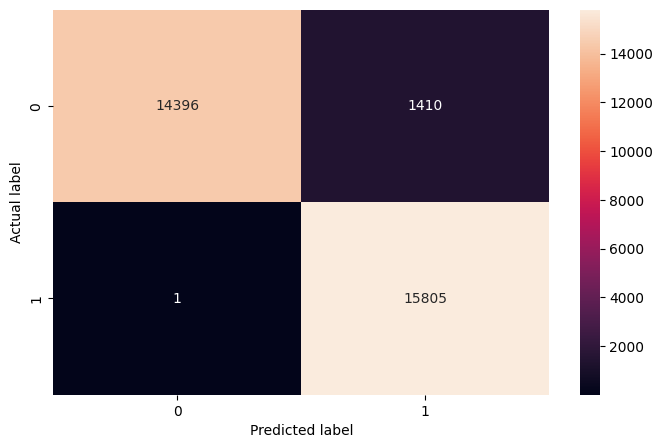

,Accuracy,Recall,Precision,F1-score
0,0.955365,0.999937,0.918095,0.95727


In [106]:
# training decision tree
dec_train = model_performance_classification(dec_tree, x_train, y_train)

dec_train 

The model achieves high accuracy and recall on the training set, indicating that it is able to capture most of the patterns and classify the samples correctly. However, the significantly higher recall compared to precision suggests that the model might be overly sensitive and classifying some negative samples as positive. This could be an indication of overfitting, where the model memorizes the training data instead of generalizing well to new, unseen dat

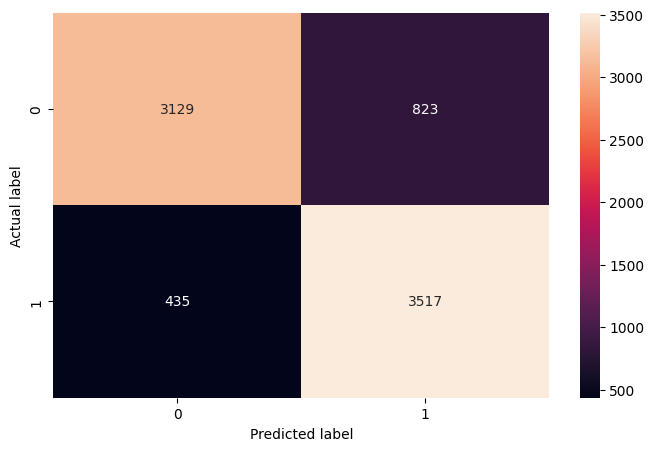

,Accuracy,Recall,Precision,F1-score
0,0.84084,0.889929,0.810369,0.848288


In [107]:
# validating decision tree
dec_val = model_performance_classification(dec_tree,x_val, y_val)

dec_val

The model's performance on the validation set is slightly lower compared to the training set. Although the accuracy is still relatively high, the precision and F1-score are lower, suggesting that the model struggles to generalize well to unseen data. This further supports the notion that the model is overfitting

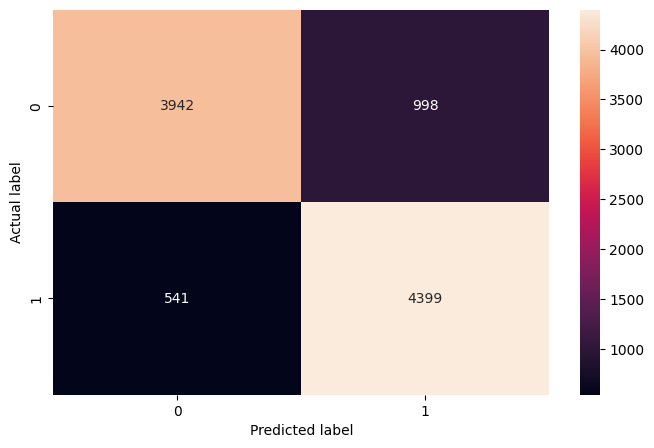

,Accuracy,Recall,Precision,F1-score
0,0.844231,0.890486,0.815082,0.851117


In [108]:
# testing decision tree
dec_test = model_performance_classification(dec_tree,x_test, y_test)

dec_test

The model's ability to correctly identify positive samples (high recall) is relatively good, but it still shows signs of overfitting as indicated by the lower precision and F1-score.

In summary, the decision tree model is likely overfitting the training data as it performs significantly better on the training set compared to the validation and test sets. The model shows relatively high recall but lower precision, indicating potential issues with generalization. Regularization techniques like pruning or adjusting hyperparameters could help mitigate the overfitting and improve the model's performance on unseen data

### Model Improvement -  Balaning dataset

 - Using SMOTE

In [109]:
# create an instance
dec2_tree = DecisionTreeClassifier(random_state= 0, class_weight={0:0.1, 1:0.9})

dec2_tree.fit(x_train_smt, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

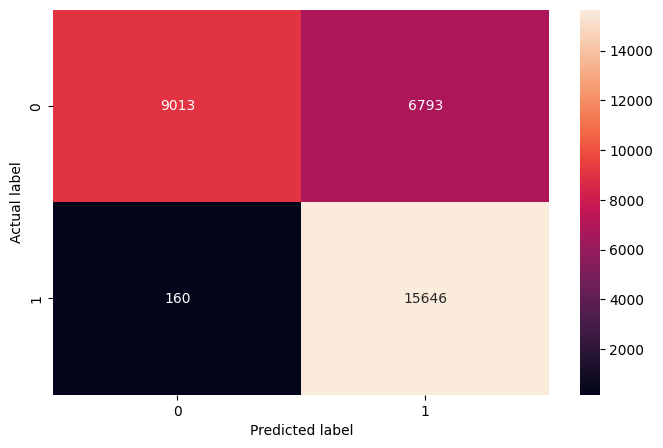

,Accuracy,Recall,Precision,F1-score
0,0.780052,0.989877,0.697268,0.818198


In [110]:
dec2_train = model_performance_classification(dec2_tree,x_train_smt, y_train)

dec2_train

The second decision tree model achieves a relatively high accuracy and recall on the training set. The recall indicates that the model is able to capture a high percentage of positive samples correctly. However, the precision is lower, suggesting that the model may also classify some negative samples as positive. Overall, the model seems to be performing reasonably well on the training set.

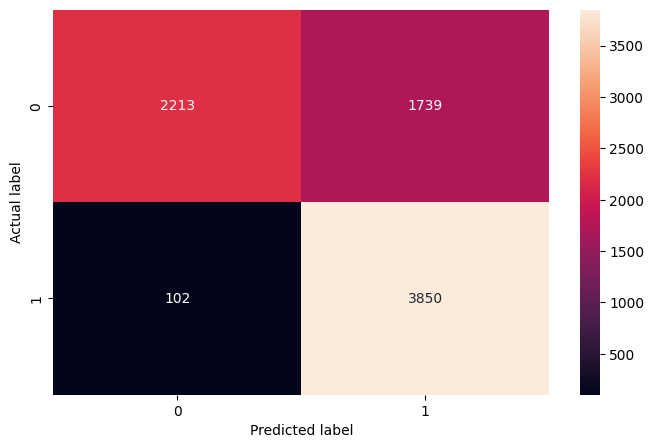

,Accuracy,Recall,Precision,F1-score
0,0.76708,0.97419,0.688853,0.807043


In [111]:
dec2_val = model_performance_classification(dec2_tree,x_val_smt, y_val)

dec2_val

The performance of the second decision tree model on the validation set is slightly lower compared to the training set. The accuracy, recall, precision, and F1-score are all slightly lower, indicating a small decrease in performance. However, the model still achieves relatively high recall and performs reasonably well on the validation set

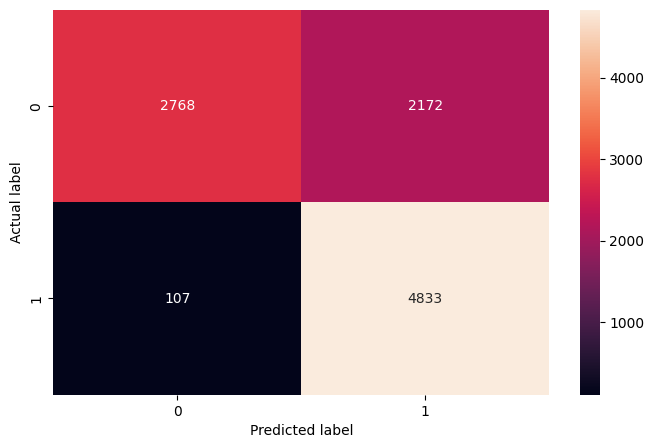

,Accuracy,Recall,Precision,F1-score
0,0.769332,0.97834,0.689936,0.809209


In [112]:
dec2_test = model_performance_classification(dec2_tree,x_test_smt, y_test)

dec2_test

The model seems to generalize reasonably well to unseen data, as indicated by the high recall. However, the precision and F1-score are still relatively lower, suggesting some room for improvement.

In summary, both models show signs of overfitting, as their performance on the training set is significantly better than on the validation and test sets.

The second decision tree model (dec2_tree) is performing better than the first model (dec_tree) in terms of recall, but it still shows signs of overfitting. It demonstrates a reasonable ability to generalize to unseen data but could benefit from further allpying pre-pruing strategy

### Applying pre-pruning strategy

- Set max_depth=4

- Threshold - 0.4


In [113]:
# build the model

# Apply pre-pruning by using max_depth of 4 for instance


dec3_tree = DecisionTreeClassifier(random_state= 0, max_depth = 4)

dec3_tree.fit(x_train_smt, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

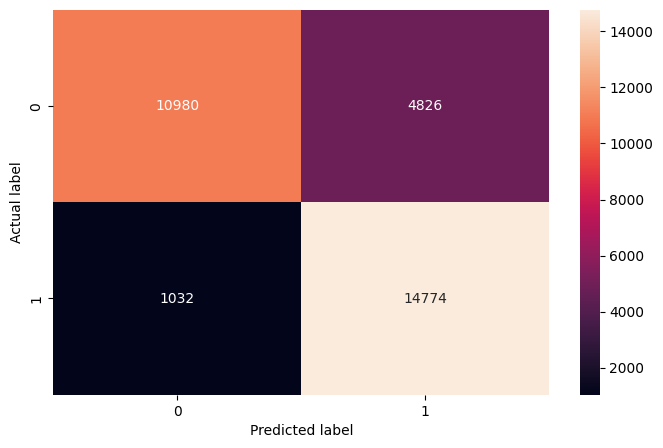

,Accuracy,Recall,Precision,F1-score
0,0.814691,0.934708,0.753776,0.834548


In [114]:
dec3_train = model_performance_classification(dec3_tree,x_train_smt, y_train, threshold = 0.4)

dec3_train

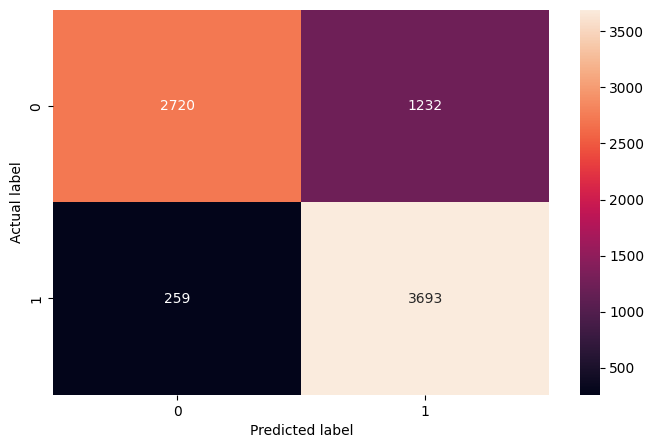

,Accuracy,Recall,Precision,F1-score
0,0.811361,0.934464,0.749848,0.832038


In [115]:
dec3_val = model_performance_classification(dec3_tree,x_val_smt, y_val,threshold = 0.4)

dec3_val

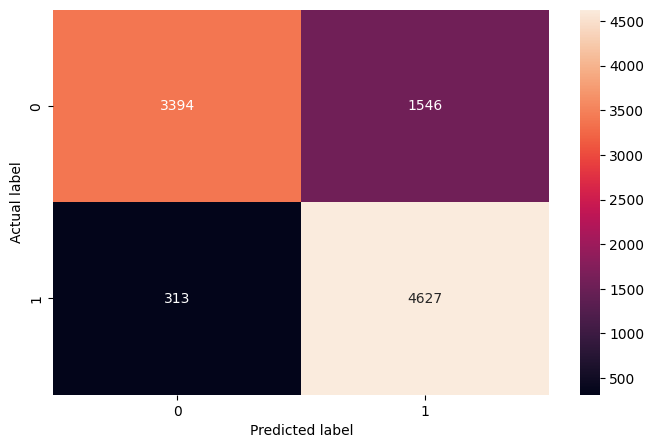

,Accuracy,Recall,Precision,F1-score
0,0.811842,0.93664,0.749555,0.832718


In [116]:
dec3_test = model_performance_classification(dec3_tree,x_test_smt, y_test, threshold = 0.4)

dec3_test

The third model shows a relatively consistent performance across the training, validation, and test sets. The accuracy, recall, precision, and F1-score are all relatively close, suggesting that the model is generalizing well to unseen data, the third model performs slightly better, particularly in terms of recall and precision though the performance metrics is comparable to those of the second model

The threshold adjustment of 0.4 for classification may be affecting the precision and recall values.

In conclusion, the third decision tree model appears to be generalizing well and performing at a similar or slightly better level compared to the second model. 

Based on these models and findings, as a data scientist at DeltaSquare, i will suggest the following, as the proposal to government, on DeltaSquare upcoming policy framework targetted at improving the lives of underprivileged sections of society:

1. Education and Skills Enhancement Programs: Delta Square can focus on providing education and skills enhancement programs to underprivileged communities, with an emphasis on increasing the number of years of education. This can help individuals acquire the necessary qualifications and knowledge to secure higher-paying jobs.

2. Job Placement and Training: Delta Square can collaborate with local organizations to provide job placement assistance and training programs, particularly in occupations with higher earning potential such as executive-managerial roles. This can help individuals gain access to better job opportunities and increase their chances of earning higher salaries.And also with a focus on the Unemployed

3. Financial Education: Delta Square can offer financial education programs to help individuals understand the importance of capital gains and losses and how they can impact income. This can include topics such as investment strategies, asset management, and financial planning.

4. Support for Marital Status: Delta Square can provide support programs tailored to the needs of individuals who are not married or have never been married. This can include initiatives such as mentoring, networking opportunities, and career development support to help them overcome barriers and improve their earning potential.

5. Cultural Exchange and Integration: Delta Square can facilitate cultural exchange programs and integration initiatives to foster diversity and inclusion. By promoting understanding and acceptance of individuals from different countries and cultures, it can contribute to creating equal opportunities for all, regardless of their native country.

Overall, these suggestions aim to address the identified factors influencing salary and create an inclusive environment that promotes equal opportunities for underprivileged communities.